# Task 2. Investigating Relationships (part 1)

Analyze the data on Global AI Job Market & Salary Trends 2025.

[Source](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025)

The file `ai_job_dataset.csv` contains the following variables:

| Variable name | Variable description
|:-------------------:|:------------------:|
| job_id | Unique identifier for each job posting |
| job_title | Standardized job title | 
| salary_usd | Annual salary in USD| 
| salary_currency | Original salary currency| 
| salary_local | Salary in local currency| 
| experience_level | EN (Entry), MI (Mid), SE (Senior), EX (Executive)| 
| employment_type |	FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)| 
| company_location | Country where company is located| 	
| company_size | S (Small <50), M (Medium 50-250), L (Large >250)| 
| employee_residence |	Country where employee resides|
| remote_ratio | 0 (No remote), 50 (Hybrid), 100 (Fully remote)|
| required_skills |	Top 5 required skills (comma-separated)|
| education_required |	Minimum education requirement|
| years_experience | Required years of experience|
| industry | Industry sector of the company |
| posting_date | Date when job was posted |
| application_deadline | Application deadline |
| job_description_length | Character count of job description |
| benefits_score |	Numerical score of benefits package (1-10) |

Please complete the following tasks.

1. For interval or ratio scale variables run suitable normality tests to check whether their distribution is close to the normal distribution. Formulate hypothesis. Create graphs to compare the variables’ distributions with the normal distribution. Make conclusions. 

In [65]:
# your code here

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings


df = pd.read_csv('ai_job_dataset.csv')

# number of observations and variables, variables’ measurement scale
df.describe()
warnings.filterwarnings('ignore')


In [37]:
interval_or_ratio_scale_variables = ['salary_usd', 'remote_ratio', 'years_experience', 'job_description_length', 'benefits_score']

df[interval_or_ratio_scale_variables]

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
0,90376,50,9,1076,5.9
1,61895,100,1,1268,5.2
2,152626,0,2,1974,9.4
3,80215,50,7,1345,8.6
4,54624,100,0,1989,6.6
...,...,...,...,...,...
14995,38604,50,1,1635,7.9
14996,57811,0,0,1624,8.2
14997,189490,50,17,1336,7.4
14998,79461,0,1,1935,5.6


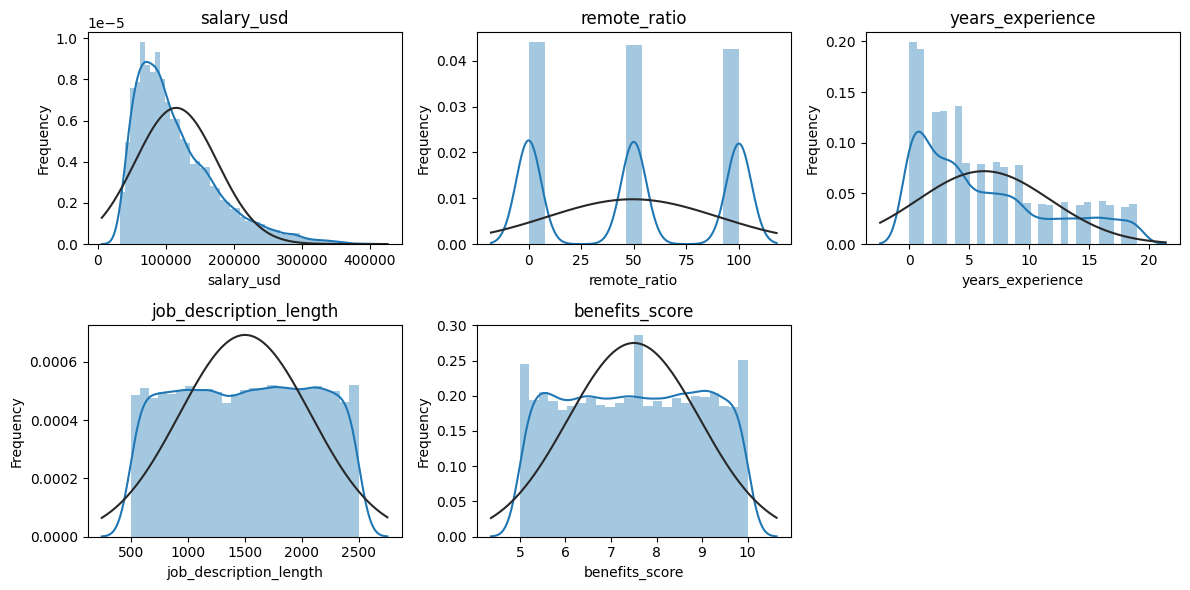

In [38]:
# used llm to plot multiple plots on one chart 

from scipy.stats import norm

vars = interval_or_ratio_scale_variables
n = len(vars)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3))
axes = axes.flatten()

for i, var in enumerate(vars):
    ax = axes[i]
    # ax.hist(df[var].dropna(), bins=20)

    sns.distplot(df[var].dropna(), ax=ax, fit=norm) 

    ax.set_title(var)
    ax.set_ylabel('Frequency')

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [39]:
for var in interval_or_ratio_scale_variables:
    print(var, stats.shapiro(df[var].dropna()))
    print()

salary_usd ShapiroResult(statistic=np.float64(0.9008752460033119), pvalue=np.float64(1.7227839713232158e-70))

remote_ratio ShapiroResult(statistic=np.float64(0.7932819526307022), pvalue=np.float64(1.095536091974231e-86))

years_experience ShapiroResult(statistic=np.float64(0.893950136330292), pvalue=np.float64(6.599084785316593e-72))

job_description_length ShapiroResult(statistic=np.float64(0.9553456395491147), pvalue=np.float64(7.474712240216052e-55))

benefits_score ShapiroResult(statistic=np.float64(0.9535387124797855), pvalue=np.float64(1.3909397677882636e-55))



H1: The distribution of var is different from the normal distribution

H0: The distribution of var is not different from the normal distribution

Conclusion: 
as p-value < 0.05 each of variables, H1 is accepted => the distribution is significantly different from normal for every variable

-------

2. Run a chi-square test to analyze the relationship between categorical variables. You can take the existing variables or create new categorical variables based on interval or ratio scale variables. Explain why the chi-square test is applicable to analyze the relationship between the selected pairs of variables. Create a contingency table based on these variables and describe the tendencies that you can observe in frequency distribution. Formulate hypotheses for the chi-square test, interpret the results of analysis and make conclusions. Create a suitable graph to demonstrate the relationship between the selected variables.

In [40]:
# your code here

categorical_vars = ['experience_level', 'employment_type', 'company_size']
df_categorical_vars = df[categorical_vars]
df_categorical_vars


,experience_level,employment_type,company_size
0,SE,CT,M
1,EN,CT,M
2,MI,FL,L
3,SE,FL,M
4,EN,PT,S
...,...,...,...
14995,EN,FL,S
14996,EN,CT,M
14997,EX,CT,L
14998,EN,FT,M



--- Анализ: experience_level vs employment_type ---
Contingency table (counts):
employment_type    CT    FL   FT   PT
experience_level                     
EN                912   900  939  967
EX                953   920  963  924
MI                937  1000  924  920
SE                919   938  986  898

Chi2 = 11.512198
Degrees of freedom = 9
p-value = 0.242226
n = 15000, table shape = 4 x 4
Cramer's V = 0.015995

Expected frequencies:
employment_type       CT      FL      FT      PT
experience_level                                
EN                922.31  931.48  944.87  919.34
EX                932.73  942.01  955.54  929.72
MI                937.94  947.27  960.88  934.92
SE                928.02  937.25  950.71  925.02

Standardized residuals (obs - exp) / sqrt(exp):
employment_type      CT     FL     FT     PT
experience_level                            
EN               -0.340 -1.032 -0.191  1.572
EX                0.664 -0.717  0.241 -0.188
MI               -0.031  1.713 -

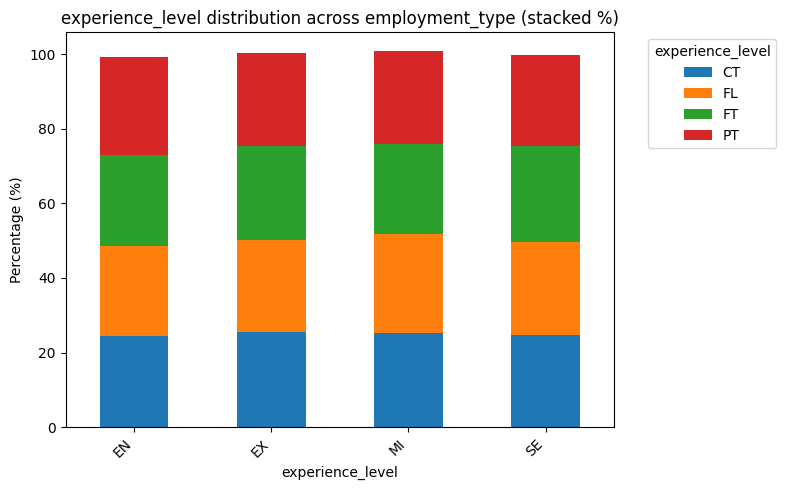

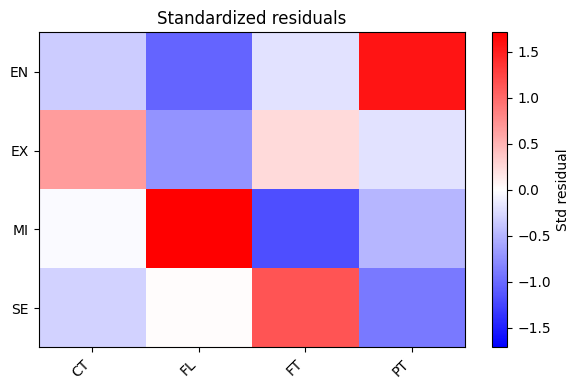

Интерпретация: p >= 0.05 → нет статистически значимой связи между experience_level и employment_type (на уровне 0.05).

--- Анализ: experience_level vs company_size ---
Contingency table (counts):
company_size         L     M     S
experience_level                  
EN                1214  1237  1267
EX                1201  1263  1296
MI                1284  1277  1220
SE                1299  1218  1224

Chi2 = 10.056921
Degrees of freedom = 6
p-value = 0.122275
n = 15000, table shape = 4 x 3
Cramer's V = 0.018309

Expected frequencies:
company_size            L        M        S
experience_level                           
EN                1238.84  1238.09  1241.07
EX                1252.83  1252.08  1255.09
MI                1259.83  1259.07  1262.10
SE                1246.50  1245.75  1248.75

Standardized residuals (obs - exp) / sqrt(exp):
company_size          L      M      S
experience_level                     
EN               -0.706 -0.031  0.736
EX               -1.464  0.309

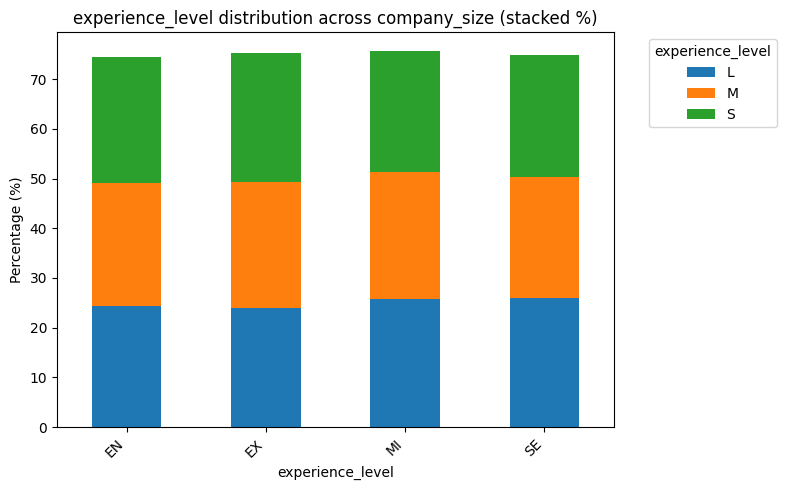

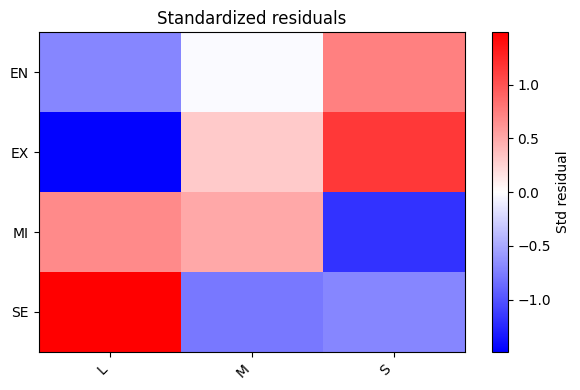

Интерпретация: p >= 0.05 → нет статистически значимой связи между experience_level и company_size (на уровне 0.05).

--- Анализ: employment_type vs company_size ---
Contingency table (counts):
company_size        L     M     S
employment_type                  
CT               1220  1230  1271
FL               1265  1246  1247
FT               1272  1285  1255
PT               1241  1234  1234

Chi2 = 1.726364
Degrees of freedom = 6
p-value = 0.943068
n = 15000, table shape = 4 x 3
Cramer's V = 0.007586

Expected frequencies:
company_size           L        M        S
employment_type                           
CT               1239.84  1239.09  1242.07
FL               1252.17  1251.41  1254.42
FT               1270.16  1269.40  1272.45
PT               1235.84  1235.10  1238.06

Standardized residuals (obs - exp) / sqrt(exp):
company_size         L      M      S
employment_type                     
CT              -0.563 -0.258  0.821
FL               0.363 -0.153 -0.210
FT           

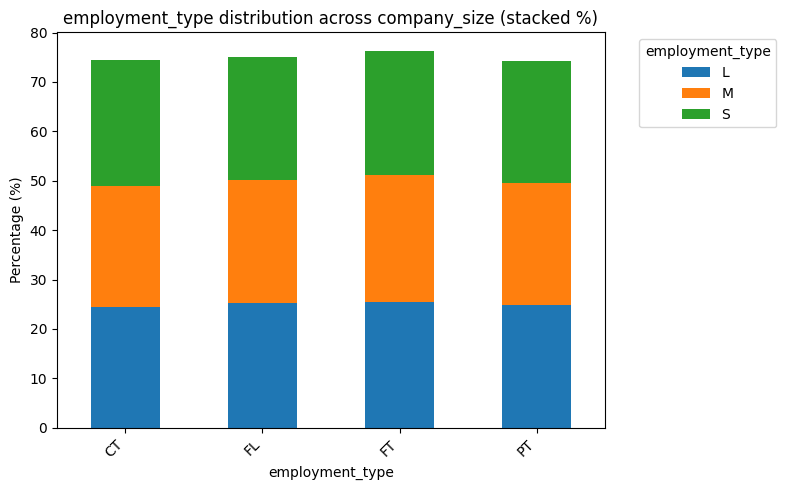

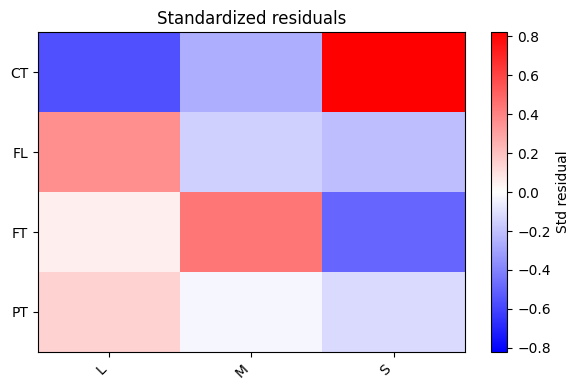

Интерпретация: p >= 0.05 → нет статистически значимой связи между employment_type и company_size (на уровне 0.05).


In [41]:
import itertools


for c in df_categorical_vars.columns:
    if df_categorical_vars[c].dtype == bool:
        df_categorical_vars[c] = df_categorical_vars[c].astype(int)
    df_categorical_vars[c] = df_categorical_vars[c].fillna("Missing").astype(str)

# Вспомогательная функция: Cramer's V
def cramers_v(chi2, n, r, k):
    denom = n * (min(r - 1, k - 1))
    return np.sqrt(chi2 / denom) if denom > 0 else np.nan

# Функция анализа одной пары
def chi2_analysis(var_a, var_b, df_sub, plot=True):
    a = df_sub[var_a].astype(str)
    b = df_sub[var_b].astype(str)

    # Контингентная таблица
    ct = pd.crosstab(a, b)
    print(f"\n--- Анализ: {var_a} vs {var_b} ---")
    print("Contingency table (counts):")
    print(ct)

    # χ²-тест (используем stats.chi2_contingency)
    chi2, p, dof, expected = stats.chi2_contingency(ct, correction=False)
    n = ct.values.sum()
    r, k = ct.shape
    v = cramers_v(chi2, n, r, k)

    print(f"\nChi2 = {chi2:.6f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p:.6f}")
    print(f"n = {n}, table shape = {r} x {k}")
    print(f"Cramer's V = {v:.6f}")

    # Ожидаемые частоты и стандартизованные остатки
    expected_df = pd.DataFrame(expected, index=ct.index, columns=ct.columns)
    std_resid = (ct.values - expected) / np.sqrt(expected)
    std_resid_df = pd.DataFrame(std_resid, index=ct.index, columns=ct.columns)

    print("\nExpected frequencies:")
    print(expected_df.round(2))
    print("\nStandardized residuals (obs - exp) / sqrt(exp):")
    print(std_resid_df.round(3))

    # Процентные распределения: внутри каждой категории var_b — какая доля var_a
    ct_pct = ct.div(ct.sum(axis=0), axis=1) * 100
    print("\nDistribution of", var_a, "within each", var_b, "(%) :")
    print(ct_pct.round(2))

    # Графики
    if plot:
        # 1) Stacked bar (проценты)
        fig, ax = plt.subplots(figsize=(8, 5))
        ct_pct_plot = ct.div(ct.sum(axis=0), axis=1) * 100  # проценты по столбцам B
        ct_pct_plot.plot(kind='bar', stacked=True, ax=ax)
        ax.set_ylabel("Percentage (%)")
        ax.set_title(f"{var_a} distribution across {var_b} (stacked %)")
        ax.legend(title=var_a, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        plt.show()

        # 2) Heatmap standardized residuals
        fig2, ax2 = plt.subplots(figsize=(max(6, k*1.2), max(4, r*0.6)))
        im = ax2.imshow(std_resid, cmap='bwr', aspect='auto',
                        vmin=-np.max(np.abs(std_resid)), vmax=np.max(np.abs(std_resid)))
        ax2.set_xticks(np.arange(k))
        ax2.set_yticks(np.arange(r))
        ax2.set_xticklabels(ct.columns, rotation=45, ha='right')
        ax2.set_yticklabels(ct.index)
        ax2.set_title("Standardized residuals")
        cbar = fig2.colorbar(im, ax=ax2)
        cbar.set_label("Std residual")
        plt.tight_layout()
        plt.show()

    # Краткая интерпретация
    alpha = 0.05
    if p < alpha:
        print(f"Интерпретация: p < {alpha} → статистически значимая связь между {var_a} и {var_b}.")
    else:
        print(f"Интерпретация: p >= {alpha} → нет статистически значимой связи между {var_a} и {var_b} (на уровне {alpha}).")

    return {
        "contingency": ct,
        "chi2": chi2,
        "p_value": p,
        "dof": dof,
        "expected": expected_df,
        "std_resid": std_resid_df,
        "cramers_v": v
    }

# Применим функцию ко всем парам переменных из categorical_vars
results = {}
for var_a, var_b in itertools.combinations(categorical_vars, 2):
    results[(var_a, var_b)] = chi2_analysis(var_a, var_b, df_categorical_vars, plot=True)


3. Calculate appropriate correlation coefficients between **any three pairs** of variables. Explain the selection of the correlation coefficient. Fill in the table below. Interpret the results. Create suitable graphs to visualize the analyzed relationships. 

| Variables | Appropriate correlation coefficient(justification of the choice) | Hypotheses | Strength of the relationship | Direction of the relationship | Statistical significance of the relationship! |
| --- | --- | --- | --- | --- | --- |
| salary_usd vs years_experience | Pearson (both continuous, linear relationship are expected) | H0: ρ=0 (no correlation), H1: ρ≠0 | Strong (r = 0.738) | Positive (more experience means higher salary) | Highly significant (ρ = 0.000000) |
| salary_usd vs benefits_score | Spearman (monotonic, not strictly linear; benefits are bounded 1–10) | H0: ρ=0, H1: ρ≠0 | None (r = –0.005) | No direction (practically zero) | Not significant (ρ = 0.554) |
| salary_usd vs remote_ratio | Spearman (remote_ratio has a natural order but not continuous) | H0: ρ=0, H1: ρ≠0 | Very weak (r = 0.017) | Slightly positive (more remote work leads to tiny salary increase) | Statistically significant (ρ = 0.042) but not practically meaningful |

In [ ]:
from scipy.stats import pearsonr, spearmanr


# calculate correlation between salary_usd and years_experience
x1 = df["years_experience"]
y1 = df["salary_usd"]
pearson_corr, pearson_p = pearsonr(x1, y1)

# calculate correlation between salary_usd and benefits_score
x2 = df["benefits_score"]
y2 = df["salary_usd"]
spearman_corr, spearman_p = spearmanr(x2, y2)

# calculate correlation between salary_usd and remote_ratio
x3 = df["remote_ratio"]
y3 = df["salary_usd"]
spearman2_corr, spearman2_p = spearmanr(x3, y3)

# print results of correlation analysis
results = pd.DataFrame({
    "Variables": [
        "salary_usd vs years_experience",
        "salary_usd vs benefits_score",
        "salary_usd vs remote_ratio"
    ],
    "Correlation Coefficient": [
        round(pearson_corr, 3),
        round(spearman_corr, 3),
        round(spearman2_corr, 3)
    ],
    "p-value": [
        pearson_p,
        spearman_p,
        spearman2_p
    ]
})

print(results)


                              Variables  Correlation Coefficient   p-value
0        salary_usd vs years_experience                    0.738  0.000000
1          salary_usd vs benefits_score                   -0.005  0.553688
2  job_description_length vs salary_usd                    0.017  0.042127


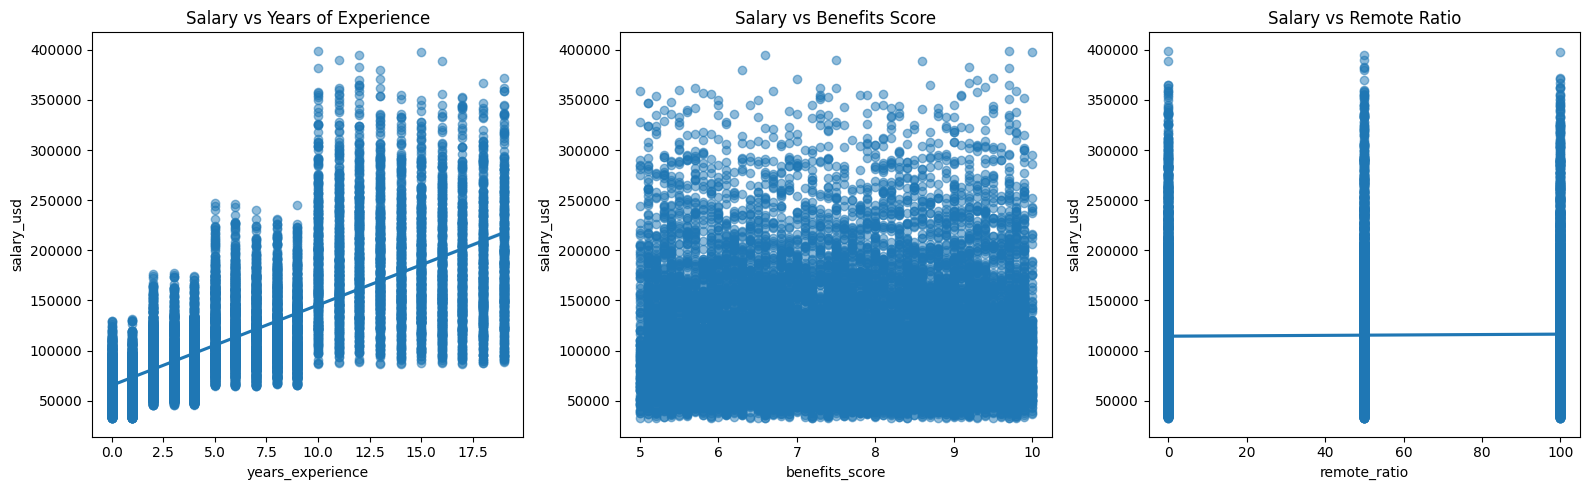

In [ ]:
"""
visualization of results
"""

plt.figure(figsize=(16,5))

# 1. Salary vs Experience
plt.subplot(1,3,1)
sns.regplot(x=x1, y=y1, scatter_kws={'alpha':0.5})
plt.title("Salary vs Years of Experience")

# 2. Salary vs Benefits Score
plt.subplot(1,3,2)
sns.regplot(x=x2, y=y2, scatter_kws={'alpha':0.5}, lowess=True)
plt.title("Salary vs Benefits Score")

# 3. Salary vs Remote Ratio
plt.subplot(1,3,3)
sns.regplot(x=x3, y=y3, scatter_kws={'alpha':0.5})
plt.title("Salary vs Remote Ratio")

plt.tight_layout()
plt.show()

4. Calculate a paired correlation coefficient between any variables. Then calculate the partial correlation coefficient between the same pair of variables controlling for any other third variable. Interpret the results of analysis. Create suitable graphs to visualize the analyzed relationships.

In [78]:
# chosen variables are salary_usd and years_experience

# calculate paired correlation between salary_usd and years_experience using pearsonr
pearson_corr, p_value = pearsonr(df['salary_usd'], df['years_experience'])

print(f"Pearson correlation between salary and years of experience: {pearson_corr:.3f}, p-value: {p_value:.3e}")

Pearson correlation between salary and years of experience: 0.738, p-value: 0.000e+00


In [72]:
# Convert categorical variables to numeric to check correlation between numeric variables

# Experience level
exp_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df['experience_level_num'] = df['experience_level'].map(exp_mapping)

# Company size
size_mapping = {'S': 1, 'M': 2, 'L': 3}
df['company_size_num'] = df['company_size'].map(size_mapping)

# Education required
edu_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
df['education_required_num'] = df['education_required'].map(edu_mapping)


                        salary_usd  years_experience  company_size_num  \
salary_usd                1.000000          0.740581          0.196077   
years_experience          0.740581          1.000000          0.001798   
company_size_num          0.196077          0.001798          1.000000   
experience_level_num      0.758504          0.925405          0.006105   
education_required_num   -0.014264         -0.018139          0.002567   
benefits_score            0.006784         -0.000910          0.010899   
job_description_length   -0.020742         -0.014435          0.014612   
remote_ratio              0.019531          0.021616          0.011947   

                        experience_level_num  education_required_num  \
salary_usd                          0.758504               -0.014264   
years_experience                    0.925405               -0.018139   
company_size_num                    0.006105                0.002567   
experience_level_num                1.000000 

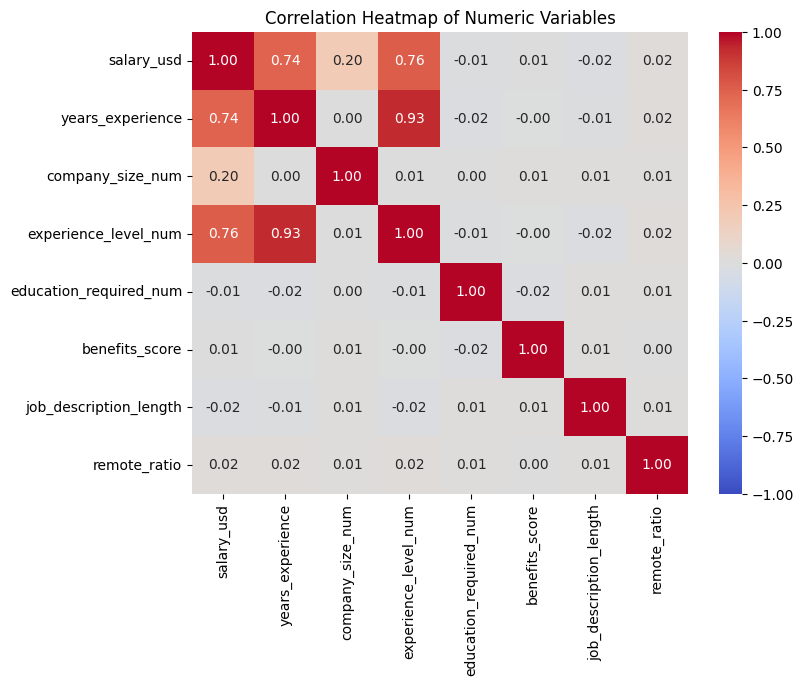

In [ ]:
# Select numeric variables
numeric_cols = [
    'salary_usd', 
    'years_experience', 
    'company_size_num',
    'experience_level_num',
    'education_required_num',
    'benefits_score', 
    'job_description_length',
    'remote_ratio'
]
df_numeric = df[numeric_cols].dropna()

# Calculate correlation matrix
corr_matrix = df_numeric.corr(method='pearson')
print(corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

# High correlation between salary_usd and years_experience, and salary_usd and experience_level_num
# Medium correlation between salary_usd and company_size
# Meanwhile, there is no strong correlation between other variables

In [87]:
import pingouin as pg # for partial correlation
# paired correlation was 0.738

# select needed columns
df_partial = df[['salary_usd', 'years_experience', 'experience_level_num', 'company_size_num']].dropna()

# Partial correlation controlling for only company_size_num
partial_corr = pg.partial_corr(data=df_partial,
                               x='salary_usd',
                               y='years_experience',
                               covar=['company_size_num'],
                               method='pearson')

print("Partial correlation between salary and years_experience controlling for experience_level and company_size:")
print(partial_corr)

# Correlation value increased from 0.738 to 0.753 because salary_usd and years_experience are positively correlated and salary_usd and company_size_num are negatively correlated.

Partial correlation between salary and years_experience controlling for experience_level and company_size:
             n         r         CI95%  p-val
pearson  15000  0.752911  [0.75, 0.76]    0.0


In [ ]:
# Partial correlation controlling for only years_experience
partial_corr = pg.partial_corr(data=df_partial,
                               x='salary_usd',
                               y='years_experience',
                               covar=['experience_level_num'],
                               method='pearson')

print("Partial correlation between salary and years_experience controlling for experience_level and company_size:")
print(partial_corr)

# Correlation value decreased from 0.753 to 0.149 because experience_level_num and years_experience are strongly correlated (p = 0.93).

Partial correlation between salary and years_experience controlling for experience_level and company_size:
             n         r         CI95%         p-val
pearson  15000  0.148618  [0.13, 0.16]  8.053807e-75


In [91]:
# Partial correlation controlling for both years_experience and company_size_num
partial_corr = pg.partial_corr(data=df_partial,
                               x='salary_usd',
                               y='years_experience',
                               covar=['experience_level_num', 'company_size_num'],
                               method='pearson')

print("Partial correlation between salary and years_experience controlling for experience_level and company_size:")
print(partial_corr)

# With both covars removed, the partial correlation became 0.159
# Thus, much of the raw correlation between salary and years of experience is actually explained by experience level and company size.
# In other words, higher salaries are not just about more years of experience — they are also about being at a higher level (grade) and/or a bigger company.

Partial correlation between salary and years_experience controlling for experience_level and company_size:
             n         r         CI95%         p-val
pearson  15000  0.158844  [0.14, 0.17]  2.484838e-85


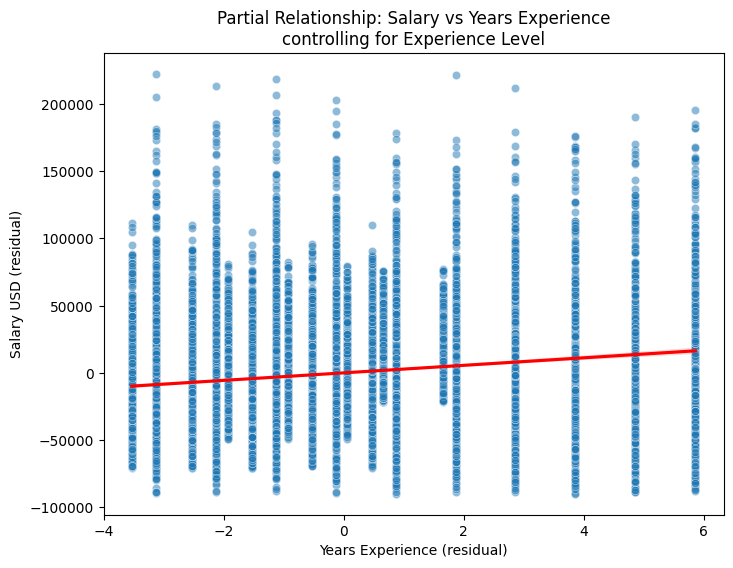

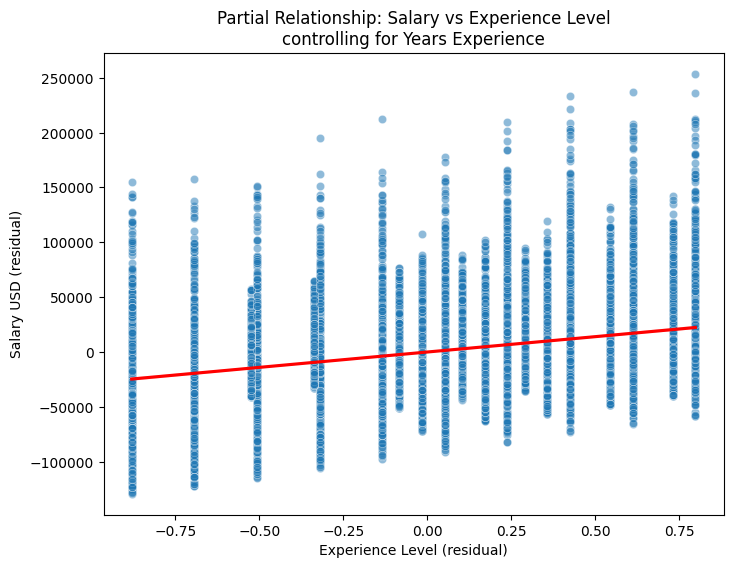

In [93]:
import statsmodels.api as sm

# 1. Partial correlation: salary vs years_experience controlling for experience_level
# Regress salary on experience_level
X = sm.add_constant(df['experience_level_num'])
y = df['salary_usd']
model = sm.OLS(y, X).fit()
residual_salary = model.resid

# Regress years_experience on experience_level
y_exp = df['years_experience']
model_exp = sm.OLS(y_exp, X).fit()
residual_exp = model_exp.resid

# Scatterplot of residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=residual_exp, y=residual_salary, alpha=0.5)
sns.regplot(x=residual_exp, y=residual_salary, scatter=False, color='red')
plt.xlabel("Years Experience (residual)")
plt.ylabel("Salary USD (residual)")
plt.title("Partial Relationship: Salary vs Years Experience\ncontrolling for Experience Level")
plt.show()


# 2. Partial correlation: salary vs experience_level controlling for years_experience
# Regress salary on years_experience
X = sm.add_constant(df['years_experience'])
model = sm.OLS(y, X).fit()
residual_salary = model.resid

# Regress experience_level on years_experience
X = sm.add_constant(df['years_experience'])
y_level = df['experience_level_num']
model_level = sm.OLS(y_level, X).fit()
residual_level = model_level.resid

# Scatterplot of residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=residual_level, y=residual_salary, alpha=0.5)
sns.regplot(x=residual_level, y=residual_salary, scatter=False, color='red')
plt.xlabel("Experience Level (residual)")
plt.ylabel("Salary USD (residual)")
plt.title("Partial Relationship: Salary vs Experience Level\ncontrolling for Years Experience")
plt.show()


Comments on the task and principles of its assessment:

- All points of the task must be accompanied by _executed_ code fragments.
- All results of the code execution (statistics, graphs, tables) should be commented, conclusions in the written form should be made based on them.
- If you have completed this task, you will receive 8 points (excellent grade). To get a higher grade (9 or 10), you need to go beyond the proposed task. For example, use additional methods to investigate relationships between variables.
- This task consists of four parts. The first weighs 20%, the second - 20%, the third - 20%, the fourth - 20%.
- The task can be completed individually or in a group of 2 students, the assessment criteria will be the same.
- If the task is completed by 2 students, then only one of the students should upload the work to SmartLMS.
- The name of the file uploaded to SmartLMS should include the last name(s) of the author(s) of the work.
- If you use AI in the work, you must indicate where and how exactly it was used.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 17 September 23:55. 